In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.1 MB/s eta 0:00:00


In [ ]:
from pymongo import MongoClient

#DATA EXTRACTION

In [ ]:
conn=client=MongoClient(conn)


In [ ]:
db=client['sample_airbnb']
col=db['listingsAndReviews']

In [ ]:
all_data=[]
for i in col.find():
  data= dict(id=i['_id'],
             listing_url=i['listing_url'],
             summary=i['summary'],
             description=i['description'],
             space=i['space'],
             rules=i['house_rules'],
             property_type=i['property_type'],
             Room_type = i['room_type'],
             Bed_type = i['bed_type'],
             Min_nights = int(i['minimum_nights']),
             Max_nights = int(i['maximum_nights']),
             Cancellation_policy = i['cancellation_policy'],
             Accomodates = i['accommodates'],
             Total_bedrooms = i.get('bedrooms'),
             Total_beds = i.get('beds'),
             Availability_365 = i['availability']['availability_365'],
             Price = i['price'],
             Security_deposit = i.get('security_deposit'),
             Cleaning_fee = i.get('cleaning_fee'),
             Extra_people = i['extra_people'],
             Guests_included= i['guests_included'],
             No_of_reviews = i['number_of_reviews'],
             Review_scores = i['review_scores'].get('review_scores_rating'),
             Amenities = ', '.join(i['amenities']),
             Host_id = i['host']['host_id'],
             Host_name = i['host']['host_name'],
             Street = i['address']['street'],
             Country = i['address']['country'],
             Country_code = i['address']['country_code'],
             Location_type = i['address']['location']['type'],
             Longitude = i['address']['location']['coordinates'][0],
             Latitude = i['address']['location']['coordinates'][1],
             Is_location_exact = i['address']['location']['is_location_exact']
             )
  all_data.append(data)

In [ ]:
df=pd.DataFrame(all_data)


## Data cleaning and Preprocessing

In [ ]:
df.head(3)

,id,listing_url,summary,description,space,rules,property_type,Room_type,Bed_type,Min_nights,...,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact
0,10006546,https://www.airbnb.com/rooms/10006546,Fantastic duplex apartment with three bedrooms...,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Make the house your home...,House,Entire home/apt,Real Bed,2,...,"TV, Cable TV, Wifi, Kitchen, Paid parking off ...",51399391,Ana&Gonçalo,"Porto, Porto, Portugal",Portugal,PT,Point,-8.61308,41.141300,False
1,10009999,https://www.airbnb.com/rooms/10009999,One bedroom + sofa-bed in quiet and bucolic ne...,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,I just hope the guests treat the space as they...,Apartment,Entire home/apt,Real Bed,2,...,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.23075,-22.966254,True
2,1001265,https://www.airbnb.com/rooms/1001265,A short distance from Honolulu's billion dolla...,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,The general welfare and well being of all the ...,Condominium,Entire home/apt,Real Bed,3,...,"TV, Cable TV, Wifi, Air conditioning, Pool, Ki...",5448114,David,"Honolulu, HI, United States",United States,US,Point,-157.83919,21.286340,True


In [ ]:
df.dtypes

id                      object
listing_url             object
summary                 object
description             object
space                   object
rules                   object
property_type           object
Room_type               object
Bed_type                object
Min_nights               int64
Max_nights               int64
Cancellation_policy     object
Accomodates              int64
Total_bedrooms         float64
Total_beds             float64
Availability_365         int64
Price                   object
Security_deposit        object
Cleaning_fee            object
Extra_people            object
Guests_included         object
No_of_reviews            int64
Review_scores          float64
Amenities               object
Host_id                 object
Host_name               object
Street                  object
Country                 object
Country_code            object
Location_type           object
Longitude              float64
Latitude               float64
Is_locat

In [ ]:
# changing data types

In [ ]:
df.isna().sum()

id                        0
listing_url               0
summary                   0
description               0
space                     0
rules                     0
property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accomodates               0
Total_bedrooms            5
Total_beds               13
Availability_365          0
Price                     0
Security_deposit       2084
Cleaning_fee           1531
Extra_people              0
Guests_included           0
No_of_reviews             0
Review_scores          1474
Amenities                 0
Host_id                   0
Host_name                 0
Street                    0
Country                   0
Country_code              0
Location_type             0
Longitude                 0
Latitude                  0
Is_location_exact         0
dtype: int64

In [ ]:
df.Price = df.Price.astype(str).astype(float)
df.Security_deposit = df.Security_deposit[~df.Security_deposit.isna()].astype(str).astype(float)
df.Cleaning_fee = df.Cleaning_fee[~df.Cleaning_fee.isna()].astype(str).astype(float)
df.Extra_people = df.Extra_people.astype(str).astype(float)
df.Guests_included = df.Guests_included.astype(str).astype(float)

In [ ]:
df.Review_scores = df.Review_scores.astype('Int64')

In [ ]:
df.isna().sum()

id                        0
listing_url               0
summary                   0
description               0
space                     0
rules                     0
property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accomodates               0
Total_bedrooms            5
Total_beds               13
Availability_365          0
Price                     0
Security_deposit       2084
Cleaning_fee           1531
Extra_people              0
Guests_included           0
No_of_reviews             0
Review_scores          1474
Amenities                 0
Host_id                   0
Host_name                 0
Street                    0
Country                   0
Country_code              0
Location_type             0
Longitude                 0
Latitude                  0
Is_location_exact         0
dtype: int64

In [ ]:
#missing values

In [ ]:
#total bedrooms to be filled with mode
df.Total_bedrooms.fillna(df.Total_bedrooms.mode()[0], inplace=True)
#total beds filled with median
df.Total_beds.fillna(df.Total_beds.median(), inplace=True)
df.Security_deposit.fillna(df.Security_deposit.median(),inplace=True)
df.Cleaning_fee.fillna(df.Cleaning_fee.median(),inplace=True)
df.Review_scores.fillna(df.Review_scores.median(),inplace=True)

In [ ]:
df.isna().sum()

id                     0
listing_url            0
summary                0
description            0
space                  0
rules                  0
property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accomodates            0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Security_deposit       0
Cleaning_fee           0
Extra_people           0
Guests_included        0
No_of_reviews          0
Review_scores          0
Amenities              0
Host_id                0
Host_name              0
Street                 0
Country                0
Country_code           0
Location_type          0
Longitude              0
Latitude               0
Is_location_exact      0
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated().value_counts()

False    5555
Name: count, dtype: int64

In [ ]:
# No duplicates

In [ ]:
df.head(2)

,id,listing_url,summary,description,space,rules,property_type,Room_type,Bed_type,Min_nights,...,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact
0,10006546,https://www.airbnb.com/rooms/10006546,Fantastic duplex apartment with three bedrooms...,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Make the house your home...,House,Entire home/apt,Real Bed,2,...,"TV, Cable TV, Wifi, Kitchen, Paid parking off ...",51399391,Ana&Gonçalo,"Porto, Porto, Portugal",Portugal,PT,Point,-8.61308,41.141300,False
1,10009999,https://www.airbnb.com/rooms/10009999,One bedroom + sofa-bed in quiet and bucolic ne...,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,I just hope the guests treat the space as they...,Apartment,Entire home/apt,Real Bed,2,...,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,"Rio de Janeiro, Rio de Janeiro, Brazil",Brazil,BR,Point,-43.23075,-22.966254,True


#EDA

In [ ]:
#percentage of property types
df.property_type.value_counts(normalize=True).mul(100)

property_type
Apartment                 65.274527
House                     10.909091
Condominium                7.182718
Serviced apartment         3.330333
Loft                       2.556256
Townhouse                  1.944194
Guest suite                1.458146
Bed and breakfast          1.242124
Boutique hotel             0.954095
Guesthouse                 0.900090
Hostel                     0.612061
Villa                      0.576058
Hotel                      0.468047
Aparthotel                 0.414041
Cottage                    0.360036
Other                      0.324032
Cabin                      0.270027
Bungalow                   0.252025
Resort                     0.198020
Casa particular (Cuba)     0.162016
Farm stay                  0.162016
Tiny house                 0.126013
Nature lodge               0.036004
Camper/RV                  0.036004
Boat                       0.036004
Chalet                     0.036004
Earth house                0.018002
Barn          

Text(0.5, 1.0, 'Top 10 property types')

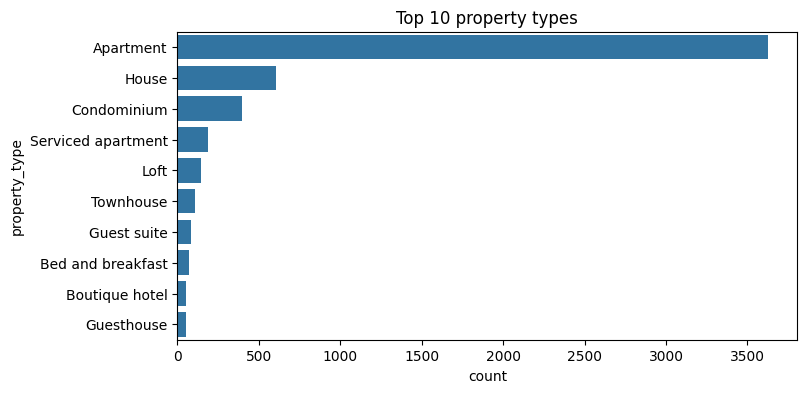

In [ ]:
# top properties
plt.figure(figsize=(8,4))
pt_ax=sns.countplot(df, y="property_type",order=df.property_type.value_counts().index[:10])
pt_ax.set_title("Top 10 property types")

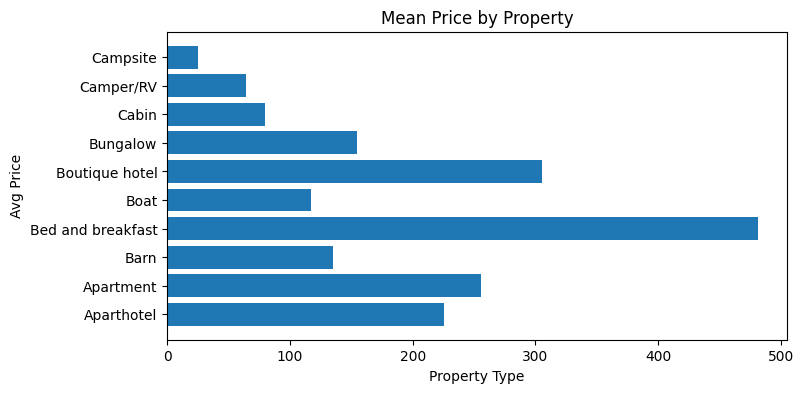

In [ ]:
#Avg price as per property
plt.figure(figsize=(8,4))
avg_price_p_type=df.Price.groupby(df.property_type.values).mean()[:10]
plt.barh(avg_price_p_type.index,avg_price_p_type.values)
plt.xlabel("Property Type")
plt.ylabel("Avg Price")
plt.title('Mean Price by Property')
plt.show()


Text(0.5, 1.0, 'Top room types')

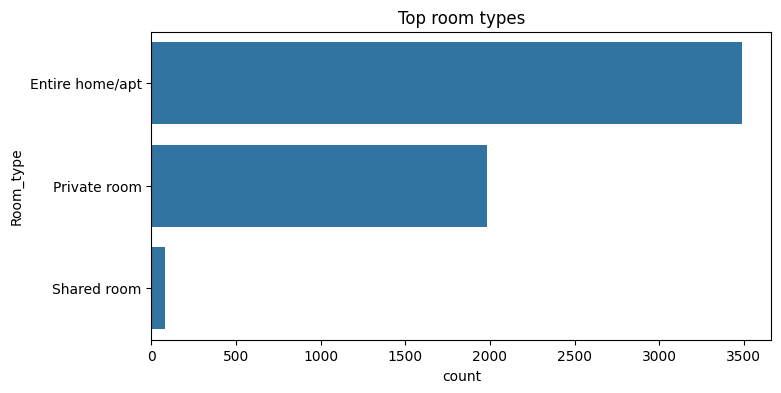

In [ ]:

plt.figure(figsize=(8,4))
pt_ax=sns.countplot(df, y="Room_type")
pt_ax.set_title("Top room types")

In [ ]:
df.to_excel("airbnb.xlsx")